# MODEL DEVELOPMENT

#### DEFINITION

* Model is a mathematical equation used to predict value given 1 or more other values
* The more relevant data that we have, the more accurate our model is

## SIMPLE LINEAR REGRESSION MODEL

* 1 independent variable x and 1 dependent variable y
* regression line will be in the form y=a+bx

In [34]:
# import package and data
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
data= pd.read_csv("C:/Users/Win 10/Documents/R DIRECTORY/College.csv")
data.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [37]:
# import Linear model from scikit learn
from sklearn.linear_model import LinearRegression

# Create linear regression object using constructor
lm=LinearRegression()

In [70]:
x = data[["Apps"]]
y = data[["Accept"]]

# FIT A LINEAR MODEL TO THE DATA
lm.fit(x,y)

# PREDICT
display(lm.predict(x)[1:10])
display(len(lm.predict(x)))

array([[1531.44792245],
       [1078.53127079],
       [ 474.44323012],
       [ 340.59978688],
       [ 576.02084329],
       [ 436.20224634],
       [1359.96101081],
       [ 845.50027587],
       [ 573.03326643]])

777

In [27]:
# FIND THE PARAMETERS ANPHA AND BETA OF THE REGRESSION MODEL
display(lm.intercept_)
display(lm.coef_)

array([225.27932017])

array([[0.59751537]])

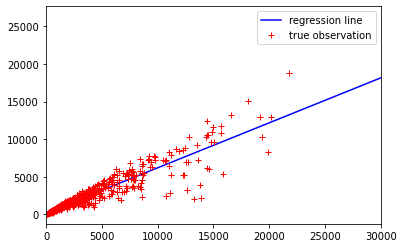

In [65]:
xp= np.linspace(0,30000,10000)

def fx(x):
    y= 225.27932017+ 0.59751537*x
    return y
yp= fx(xp)


plt.plot(xp,yp,'b-',label="regression line")
plt.plot(x,y,'r+',label="true observation")
plt.xlim(0,30000)
plt.legend()
plt.show()


## MULTIPLE LINEAR REGRESSION MODEL

* One dependent variable explained by many explanatory variables x1,x2,...

In [41]:
# Create linear regression object using constructor
lm=LinearRegression()

x = data[["Apps","Enroll","Outstate","Books"]]
y = data[["Accept"]]

# FIT A LINEAR MODEL TO THE DATA
lm.fit(x,y)

# PREDICT
display(lm.predict(x)[1:10])
display(len(lm.predict(x)))

array([[1393.91653037],
       [ 975.80507404],
       [ 376.34756762],
       [ 116.62687996],
       [ 456.96186499],
       [ 308.13404377],
       [1320.9758046 ],
       [ 747.9600436 ],
       [ 427.75693809]])

777

In [42]:
# FIND THE PARAMETERS ANPHA AND BETA OF THE REGRESSION MODEL
display(lm.intercept_)
display(lm.coef_)

array([95.73695206])

array([[ 0.38193262,  1.06426962,  0.00438456, -0.1806315 ]])

## MODEL EVALUATION USING VISUALIZATION

#### REGRESSION PLOT

* RELATIONSHIP BETWEEN VARIABLES
* THE STRENGTH OF CORRELATION
* THE DIRECTION OF RELATIONSHIP

(0.0, 30000.0)

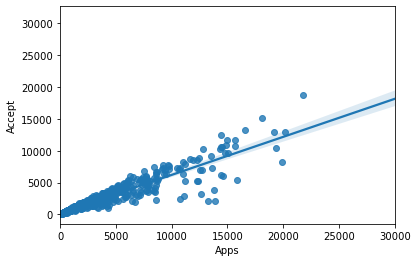

In [43]:
import seaborn as sns
sns.regplot(x="Apps",y="Accept",data=data)
plt.xlim(0,30000)

* Note the that OLS method and simple linear regression model are built based on the assumption that 
* Ut is random and normally distributed with mean=0 and constant variance
* Each ut is uncorrelated to each other and there is no correlation between xt and ut

* Hence, the residual plot must be random with mean= 0

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Apps', ylabel='Accept'>

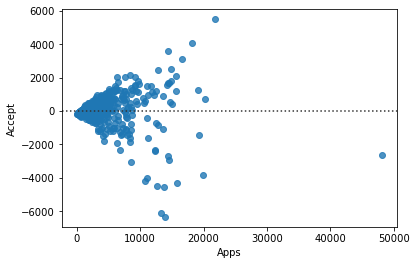

In [44]:
#### RESIDUAL PLOT

sns.residplot(data["Apps"],data["Accept"])

* Observation: 
* Though E[ut] is approximately =0, but ut are not randomly distributed. Therefore, linear regression is not a good model to fit

#### DISTRIBUTION PLOT (HISTOGRAM)

* Distribution plot can be used to compare the distribution of predicted values generated from the model and  distribution of actual value

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


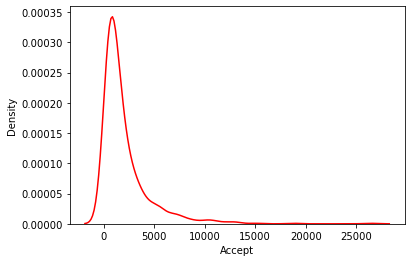

In [45]:
actual= sns.distplot(data["Accept"],hist=False, label="ACTUAL VALUE",color="r")

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

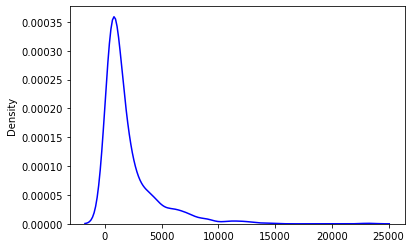

In [46]:
sns.distplot(lm.predict(x),hist=False, label="FITTED VALUE",color="b")

## POLYNOMIAL REGRESSION AND PIPELINE

* Special case of general linear regression
* Describe curvilinear relationship (quadratic, cubic, higher-order,...)

#### POLYNOMIAL REGRESSION

In [49]:
# CUBIC (3RD ORDER) POPYNOMIAL REGRESSION
# np.polyfit() function: used to fit the polynomial regression model to particular order
x= x.transpose().to_numpy().reshape(777,)
y= y.transpose().to_numpy().reshape(777,)
f=np.polyfit(x,y,5)

# Print out the regression model
p= np.poly1d(f)
print(p)

# We can also use the function p to predict target values
p(550)

            5             4             3             2
-3.271e-18 x + 2.325e-13 x - 3.898e-09 x + 1.084e-05 x + 0.6797 x + 86.02


462.4976515067302

In [70]:
xp = np.linspace(0, 100, 1000)
p(xp)

array([ 86.02193212,  86.08996805,  86.15800419,  86.22604056,
        86.29407713,  86.36211393,  86.43015094,  86.49818817,
        86.56622562,  86.63426329,  86.70230117,  86.77033927,
        86.83837758,  86.90641611,  86.97445486,  87.04249383,
        87.11053302,  87.17857242,  87.24661203,  87.31465187,
        87.38269192,  87.45073219,  87.51877267,  87.58681338,
        87.65485429,  87.72289543,  87.79093678,  87.85897835,
        87.92702014,  87.99506214,  88.06310436,  88.13114679,
        88.19918944,  88.26723231,  88.3352754 ,  88.4033187 ,
        88.47136222,  88.53940595,  88.6074499 ,  88.67549407,
        88.74353846,  88.81158306,  88.87962787,  88.94767291,
        89.01571815,  89.08376362,  89.1518093 ,  89.2198552 ,
        89.28790131,  89.35594764,  89.42399419,  89.49204095,
        89.56008793,  89.62813513,  89.69618254,  89.76423017,
        89.83227801,  89.90032607,  89.96837434,  90.03642283,
        90.10447154,  90.17252046,  90.2405696 ,  90.30

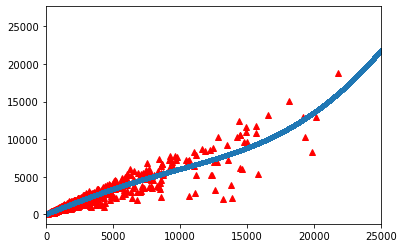

In [14]:
# Visualization
import matplotlib.pyplot as plt
xp = np.linspace(0, 25000, 100000)
_ = plt.plot(x, y, 'r^', xp, p(xp), '.',linewidth=0.5)
plt.xlim(0,25000)
plt.show()

In [18]:
# Preprocessing library in scikit-learn can create polynomial feature objects 
# fit_trasform(): used to transform features into polynomial feature

from sklearn.preprocessing import PolynomialFeatures
# Constructor of polynomial feature with specific order
PF= PolynomialFeatures(degree=5, include_bias=False)
x_polly= PF.fit_transform(data[["Apps","Accept"]])
x_polly

array([[1.66000000e+03, 1.23200000e+03, 2.75560000e+06, ...,
        5.15285948e+15, 3.82429089e+15, 2.83826890e+15],
       [2.18600000e+03, 1.92400000e+03, 4.77859600e+06, ...,
        3.40341978e+16, 2.99550762e+16, 2.63648520e+16],
       [1.42800000e+03, 1.09700000e+03, 2.03918400e+06, ...,
        2.69200770e+15, 2.06801992e+15, 1.58866796e+15],
       ...,
       [2.09700000e+03, 1.91500000e+03, 4.39740900e+06, ...,
        3.08818419e+16, 2.82015867e+16, 2.57539526e+16],
       [1.07050000e+04, 2.45300000e+03, 1.14597025e+08, ...,
        1.69147658e+18, 3.87593838e+17, 8.88152906e+16],
       [2.98900000e+03, 1.85500000e+03, 8.93412100e+06, ...,
        5.70274000e+16, 3.53917120e+16, 2.19644114e+16]])

In [24]:
# Constructor Standard Scaler is used to normalize each feature simultaneously
from sklearn.preprocessing import StandardScaler
SCALE= StandardScaler()
SCALE.fit(data[["Apps","Accept"]])
x_scale= SCALE.transform(data[["Apps","Accept"]])

In [25]:
x_scale

array([[-0.34688182, -0.32120545],
       [-0.21088404, -0.03870299],
       [-0.40686563, -0.37631793],
       ...,
       [-0.23389507, -0.04237716],
       [ 1.99171118,  0.17725626],
       [-0.00326766, -0.06687159]])

#### PIPELINE

* (2 STEPS FOR TRANSFORMATION AND LAST STEP FOR PREDICTION)
* PIPELINE SEQUENTIALLY PERFORM A SERIES OF TRANSFORMATION
* NORMALIZATION
* POLYNOMIAL TRANSFORM
* LINEAR REGRESSION 

In [16]:
# IMPORT ALL THE MODULES NECESSSARY
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [20]:
# Input contain the name of estimator model and their constructor
Input= [('scale', StandardScaler()),('polynomial',PolynomialFeatures()),('mode',LinearRegression())]

# PIPELINE CONSTRUCTOR
# Create an pipeline object
pipe= Pipeline(Input)


In [25]:
# Train the pipeline object
x = data[["Apps","Enroll","Outstate","Books"]]
y = data[["Accept"]]

# The method .fit() normalize the data, perform polynomial transformation
# The method .predict() is a function to predict the target value
pipe.fit(x,y)
pipe.predict(x).transpose()

array([[ 1455.29610603,  1486.00049206,  1016.59539183,   500.54521319,
           66.21213247,   579.36870968,   422.87387147,  1489.40320259,
          886.85149717,   466.32188979,  1561.06966098,  1621.85152589,
          796.01008471,  1133.08812429,   350.00692796,   769.27253176,
         1316.73388554,  1043.40309508,   800.60739181,  2361.21822888,
          917.52295576,  4988.52481639,   650.10456902,  9235.16438165,
          469.60772071,  1335.60827353,  1452.44893223,  5909.91709889,
          718.3389972 ,  1469.70841039,   771.79257544,   846.29091891,
          444.18910471,   519.9896976 ,  1547.11216131,   292.15426677,
         1122.2201501 ,  1779.86365834,   786.84281424,  4718.08222406,
         1053.56404871,   654.32698304,   451.6696227 ,   984.27158806,
         1058.78766306,   847.86159293,   596.99886502,   834.29819522,
         2000.59771065,  1280.59961144,   560.02369093,   252.97983044,
          250.55188716,  1089.6840742 ,   820.06563649,   336.57

## MEASURES FOR IN-SAMPLE EVALUATION

* THESE ARE NUMERICAL VALUES DETERMINING HOW GOOD THE MODEL FIT OUR DATA
* MEAN-SQUARE ERROR (MSE)
* R-SQUARE (R^2)

#### MEAN SQUARED ERROR

In [68]:
from sklearn.metrics import mean_squared_error

yp= fx(x)
mean_squared_error(y,yp)

659431.1053174739

#### R SQUARED (COEFFICIENT OF DETERMINATION)

* How close the data is to the fitted regression line
* More specifically, it determine the percentage of explained variables that is explained by the regression line
* Compare the regression model to the simple model (the mean of data points)

In [73]:
# function .score(): used to calculate the R squared
x = data[["Apps"]]
y = data[["Accept"]]

lm.fit(x,y)
lm.score(x,y)
# Conclusion, so over 89% of the y-actual values are well explained by the regression model

0.8900989818886287